In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science G.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 1.1 s, sys: 312 ms, total: 1.41 s
Wall time: 3.38 s


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 21:22:09,anakagungdiahkartikasari089@gmail.com,Anak Agung Diah Kartika Sari,1,VIIG,Anak Agung Rai Intan Kesuma Dewi,Suka di ajak bercanda,I Gusti Made Duandika,Pelawak di semua tempat,Ni Kadek Ayu Artini,"Sipaling kurus sexy, suka pilih"" Teman yang go...",Ni Ketut Dewi Anggarawati,"Pacaran kelewatan batas, pas piket gak mau ban..."
1,6/20/2023 12:22:37,nikomangsulastriasih@gmail.com,Anak Agung Rai Intan Kesuma Dewi,2,VIIG,Anak Agung Diah Kartika Sari,karena dia baik,I Gusti Ngurah Dianmika,karen dia baik,I Kadek Darendra Saputra,karena nakal dan mengejek nama ortu,Ni Ketut Dewi Anggarawati,karena sombong
2,6/20/2023 12:24:35,nikomangsulastriasih@gmail.com,I Gusti Made Duandika,3,VIIG,Anak Agung Diah Kartika Sari,karena baik,Anak Agung Rai Intan Kesuma Dewi,karena baik,I Komang Agus Adi Putra,karena suka membully nama ortu,I Putu Khoriada Purnama Putra Wasan,karena suka membully nama ortu
3,5/10/2023 18:55:01,dhendyramapratama@gmail.com,I Gst. Ngr. Dendhy Rahma Pratama,4,VIIG,I Made Ary Senthana,karena teman dri kecil,I Komang Agus Adi Putra,karena akrab,I Wayan Astra Wiguna,karna tdk suka,Ni Kadek Gandhis Sri Devi,pikmi
4,5/5/2023 18:07:19,rahdedianmika@gmail.com,I Gusti Ngurah Dianmika,5,VIIG,I Made Ary Senthana,Baik hati,I Made Ary Senthana,Baik hati,I Gusti Made Duandika,Nakal,I Gusti Made Duandika,Nakal
5,6/20/2023 12:30:05,nikomangsulastriasih@gmail.com,I Kadek Ajus Pramana,6,VIIG,I Made Yoga Adi Pranata,karena bisa diajak bercanda,I Gusti Ngurah Dianmika,karena dia selalu bercanda,I Wayan Astra Wiguna,suka meremehkan teman,Ni Ketut Antika Dewi,suka membully saya
6,5/5/2023 18:11:56,rahdedianmika@gmail.com,I Kadek Andre Dwi Pramana,7,VIIG,I Made Yoga Adi Pranata,Baik,I Kadek Ajus Pramana,Baik,I Gusti Made Duandika,Jahil,I Wayan Astra Wiguna,Jahil
7,5/5/2023 19:46:57,kadekdarendrasaputra28@gmail.com,I Kadek Darendra Saputra,8,VIIG,I Gst. Ngr. Dendhy Rahma Pratama,Gampang di ajak bergaul dan lucu,I Gst. Ngr. Dendhy Rahma Pratama,orangnya seru dan baik,I Gusti Made Duandika,suka caper di kelas,I Gusti Made Duandika,"sering joget"" sendiri"
8,5/5/2023 17:58:26,lekungkebing@gmail.com,I Kadek Dwi Saputra,9,VIIG,I Kadek Andre Dwi Pramana,Karena sering di ajak,I Wayan Arlan Parta Wijaya,Karena suka bercanda,I Gusti Made Duandika,Gj,I Gusti Made Duandika,Karena sering menyindir saya
9,5/5/2023 18:42:28,mnggussss@gmail.com,I Komang Agus Adi Putra,10,VIIG,I Gst. Ngr. Dendhy Rahma Pratama,seru,I Kadek Dwi Saputra,asik,I Gusti Made Duandika,jahat,I Gusti Made Duandika,jahat


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

            Timestamp                          Email Address  \
0   5/6/2023 21:22:09  anakagungdiahkartikasari089@gmail.com   
1  6/20/2023 12:22:37         nikomangsulastriasih@gmail.com   
2  6/20/2023 12:24:35         nikomangsulastriasih@gmail.com   
3  5/10/2023 18:55:01            dhendyramapratama@gmail.com   
4   5/5/2023 18:07:19                rahdedianmika@gmail.com   

                       NAMA LENGKAP  NO ABSEN KELAS  \
0      Anak Agung Diah Kartika Sari         1  VIIG   
1  Anak Agung Rai Intan Kesuma Dewi         2  VIIG   
2             I Gusti Made Duandika         3  VIIG   
3  I Gst. Ngr. Dendhy Rahma Pratama         4  VIIG   
4           I Gusti Ngurah Dianmika         5  VIIG   

  1. Teman anda yang paling anda sukai di kelas                  Alasan  \
0              Anak Agung Rai Intan Kesuma Dewi   Suka di ajak bercanda   
1                  Anak Agung Diah Kartika Sari         karena dia baik   
2                  Anak Agung Diah Kartika Sari            

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 4.35 ms, sys: 1.08 ms, total: 5.43 ms
Wall time: 15.3 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 1.08 ms, sys: 203 µs, total: 1.28 ms
Wall time: 1.28 ms


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data G.csv', index=False)

CPU times: user 6.86 ms, sys: 7.06 ms, total: 13.9 ms
Wall time: 19 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 601 µs, sys: 111 µs, total: 712 µs
Wall time: 692 µs


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 344 µs, sys: 89 µs, total: 433 µs
Wall time: 358 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 19.5 ms, sys: 6.26 ms, total: 25.8 ms
Wall time: 54 ms


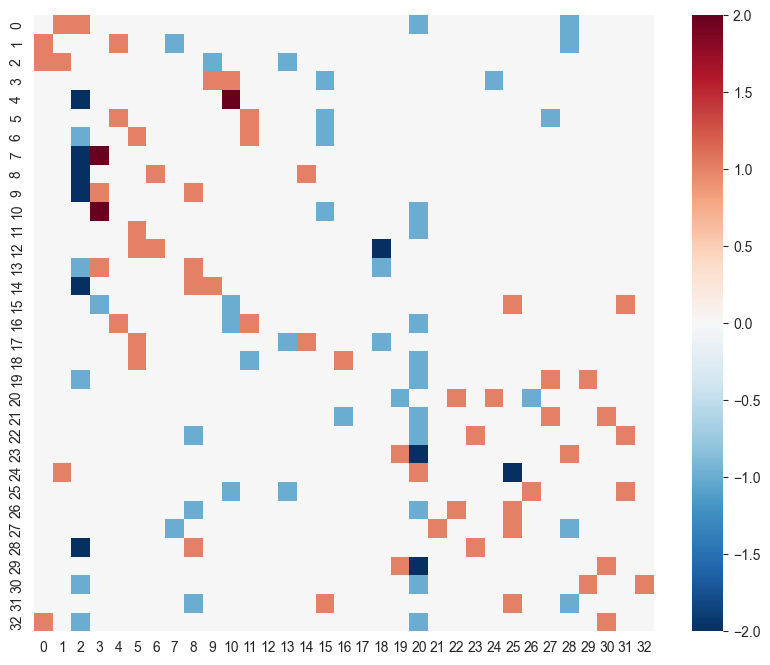

CPU times: user 3.86 s, sys: 238 ms, total: 4.09 s
Wall time: 12 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 3.32 ms, sys: 923 µs, total: 4.24 ms
Wall time: 3.59 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

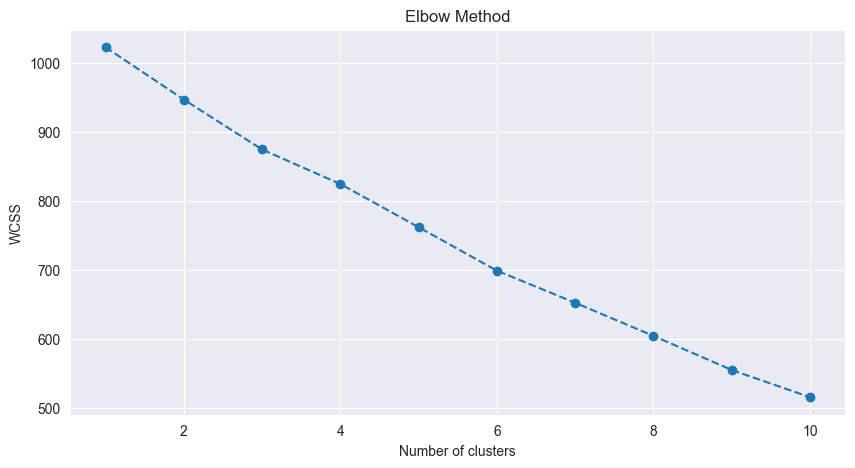

CPU times: user 3.59 s, sys: 431 ms, total: 4.02 s
Wall time: 5.09 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 126 ms, sys: 17.9 ms, total: 144 ms
Wall time: 93.4 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time


print(len(df))
print(len(clustered_students))


33
33
CPU times: user 4.73 ms, sys: 1.63 ms, total: 6.35 ms
Wall time: 11.9 ms


In [14]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

            Timestamp                          Email Address  \
0   5/6/2023 21:22:09  anakagungdiahkartikasari089@gmail.com   
1  6/20/2023 12:22:37         nikomangsulastriasih@gmail.com   
2  6/20/2023 12:24:35         nikomangsulastriasih@gmail.com   
3  5/10/2023 18:55:01            dhendyramapratama@gmail.com   
4   5/5/2023 18:07:19                rahdedianmika@gmail.com   

                       NAMA LENGKAP  NO ABSEN KELAS  \
0      Anak Agung Diah Kartika Sari         1  VIIG   
1  Anak Agung Rai Intan Kesuma Dewi         2  VIIG   
2             I Gusti Made Duandika         3  VIIG   
3  I Gst. Ngr. Dendhy Rahma Pratama         4  VIIG   
4           I Gusti Ngurah Dianmika         5  VIIG   

  1. Teman anda yang paling anda sukai di kelas                  Alasan  \
0              Anak Agung Rai Intan Kesuma Dewi   Suka di ajak bercanda   
1                  Anak Agung Diah Kartika Sari         karena dia baik   
2                  Anak Agung Diah Kartika Sari            

In [15]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



33
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [16]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 428 µs, sys: 99 µs, total: 527 µs
Wall time: 645 µs


In [17]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                   Email Address  \
1   6/20/2023 12:22:37  nikomangsulastriasih@gmail.com   
27  6/20/2023 12:36:05  nikomangsulastriasih@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
1   Anak Agung Rai Intan Kesuma Dewi         2  VIIG   
27              Ni Ketut Antika Dewi        28  VIIG   

   1. Teman anda yang paling anda sukai di kelas                Alasan  \
1                   Anak Agung Diah Kartika Sari       karena dia baik   
27                        Ni Kadek Chantikariani  karena orangnya baik   

   2. Teman anda yang paling anda sukai di kelas                ALASAN  \
1                        I Gusti Ngurah Dianmika        karen dia baik   
27                          Ni Kadek Indi Varini  karena orangnya baik   

   1. Teman anda yang paling anda tidak sukai di kelas  \
1                            I Kadek Darendra Saputra    
27                           I Kadek Darendra Saputra    

                               ALAS

In [18]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 72 µs, sys: 52 µs, total: 124 µs
Wall time: 133 µs


In [19]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 11.4 ms, sys: 2.34 ms, total: 13.8 ms
Wall time: 32.3 ms


In [20]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 19.2 ms, sys: 4.69 ms, total: 23.9 ms
Wall time: 51.3 ms


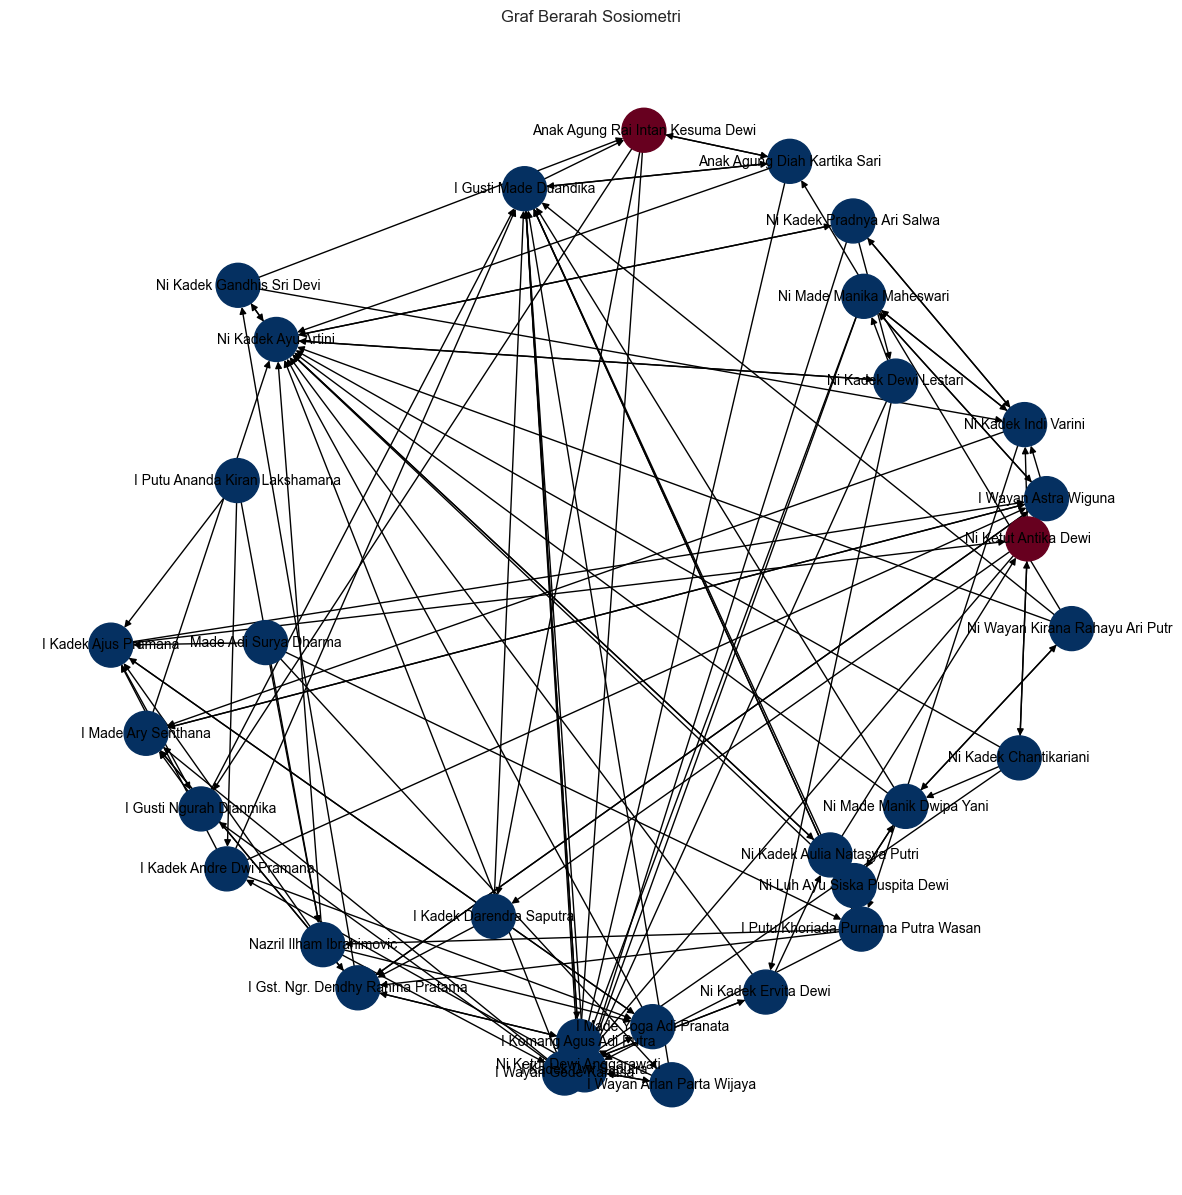

CPU times: user 4.43 s, sys: 388 ms, total: 4.82 s
Wall time: 11.2 s


In [21]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [22]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 364 µs, sys: 7 µs, total: 371 µs
Wall time: 384 µs


In [23]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 11.9 ms, sys: 3.57 ms, total: 15.5 ms
Wall time: 36.7 ms


In [24]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp                          Email Address  \
0    5/6/2023 21:22:09  anakagungdiahkartikasari089@gmail.com   
25   5/5/2023 18:00:15               indivahrini206@gmail.com   
31   5/5/2023 18:34:26             manikamaheswari9@gmail.com   
3   5/10/2023 18:55:01            dhendyramapratama@gmail.com   
4    5/5/2023 18:07:19                rahdedianmika@gmail.com   

                        NAMA LENGKAP  NO ABSEN KELAS  \
0       Anak Agung Diah Kartika Sari         1  VIIG   
25              Ni Kadek Indi Varini        26  VIIG   
31          Ni Made Manika Maheswari        32  VIIG   
3   I Gst. Ngr. Dendhy Rahma Pratama         4  VIIG   
4            I Gusti Ngurah Dianmika         5  VIIG   

   1. Teman anda yang paling anda sukai di kelas  \
0               Anak Agung Rai Intan Kesuma Dewi   
25                      Ni Made Manika Maheswari   
31                          I Wayan Astra Wiguna   
3                          

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


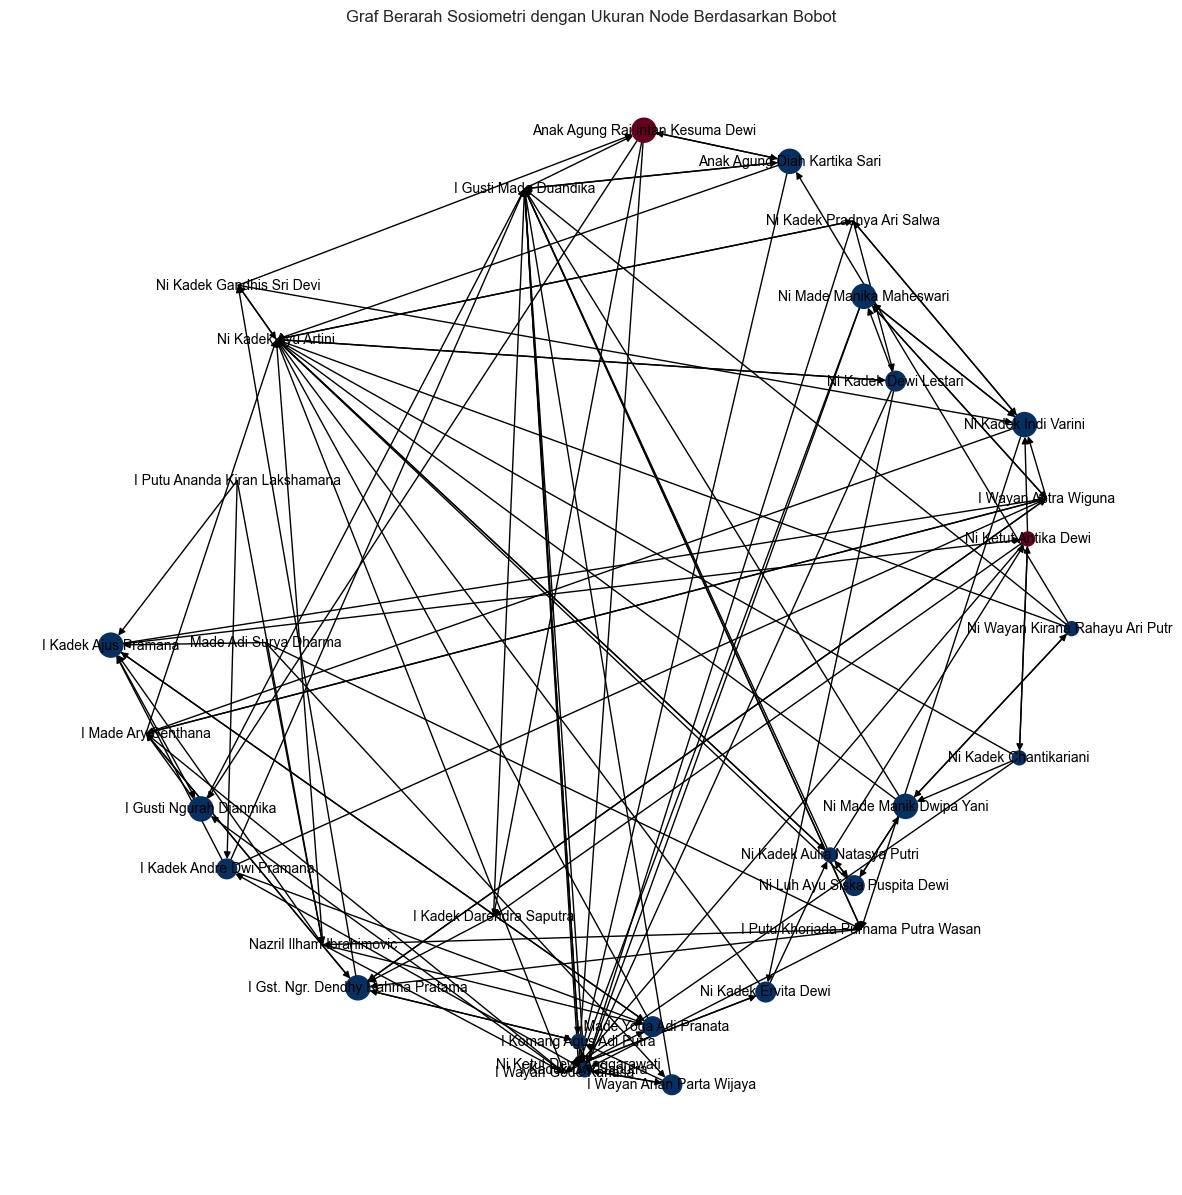

CPU times: user 3.45 s, sys: 261 ms, total: 3.71 s
Wall time: 8.32 s


In [25]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [26]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 1 ms, sys: 1.3 ms, total: 2.3 ms
Wall time: 11.7 ms


In [27]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 427 µs, sys: 18 µs, total: 445 µs
Wall time: 480 µs


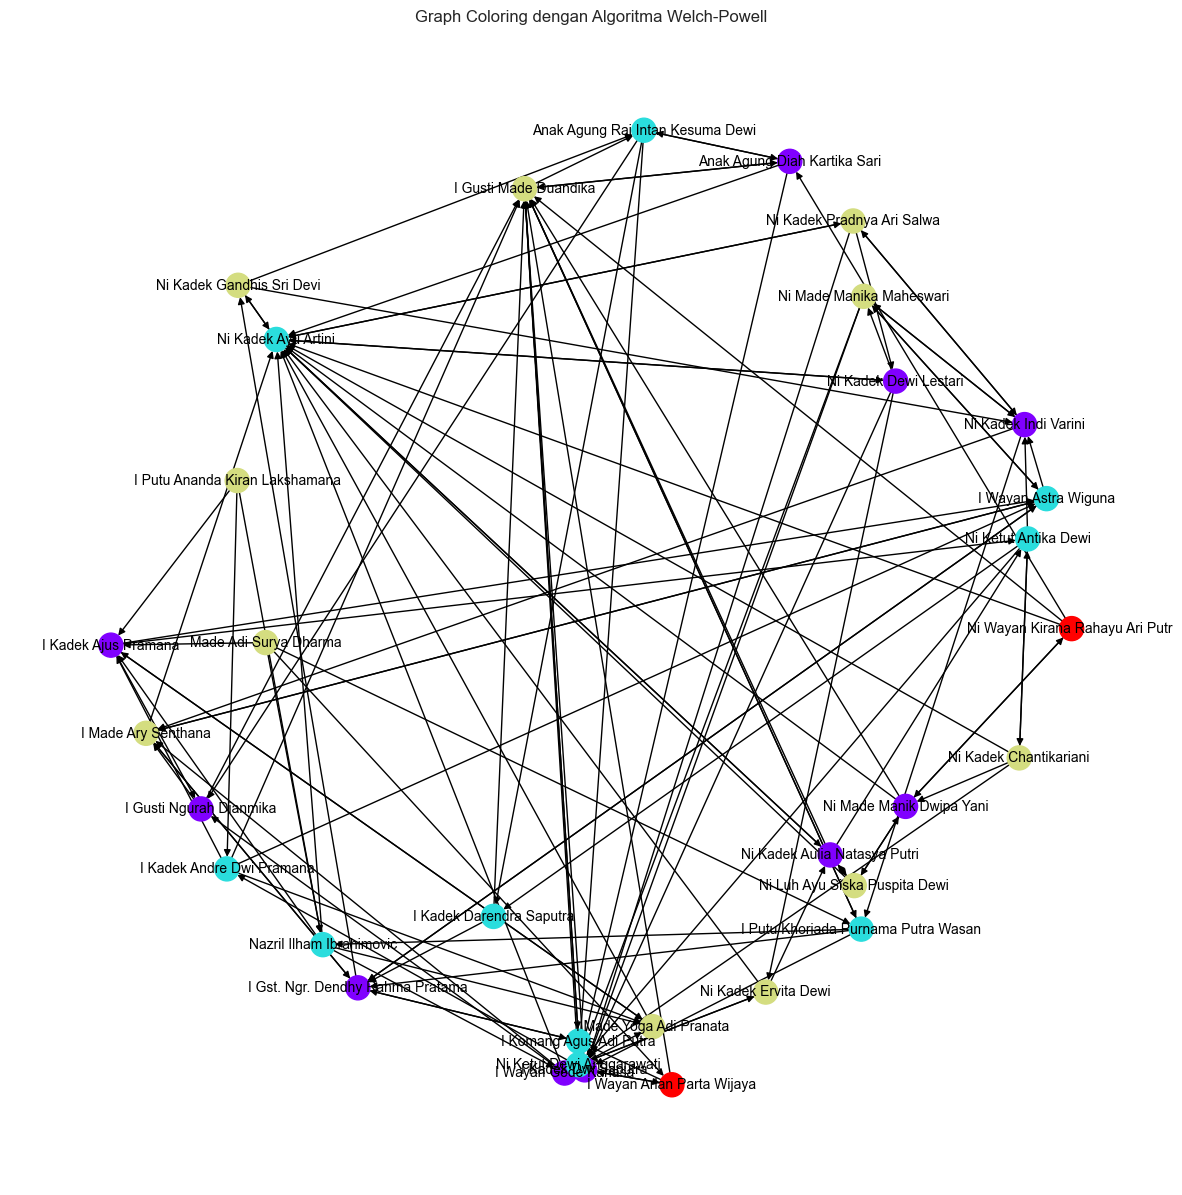

CPU times: user 4.03 s, sys: 293 ms, total: 4.33 s
Wall time: 8.55 s


In [28]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


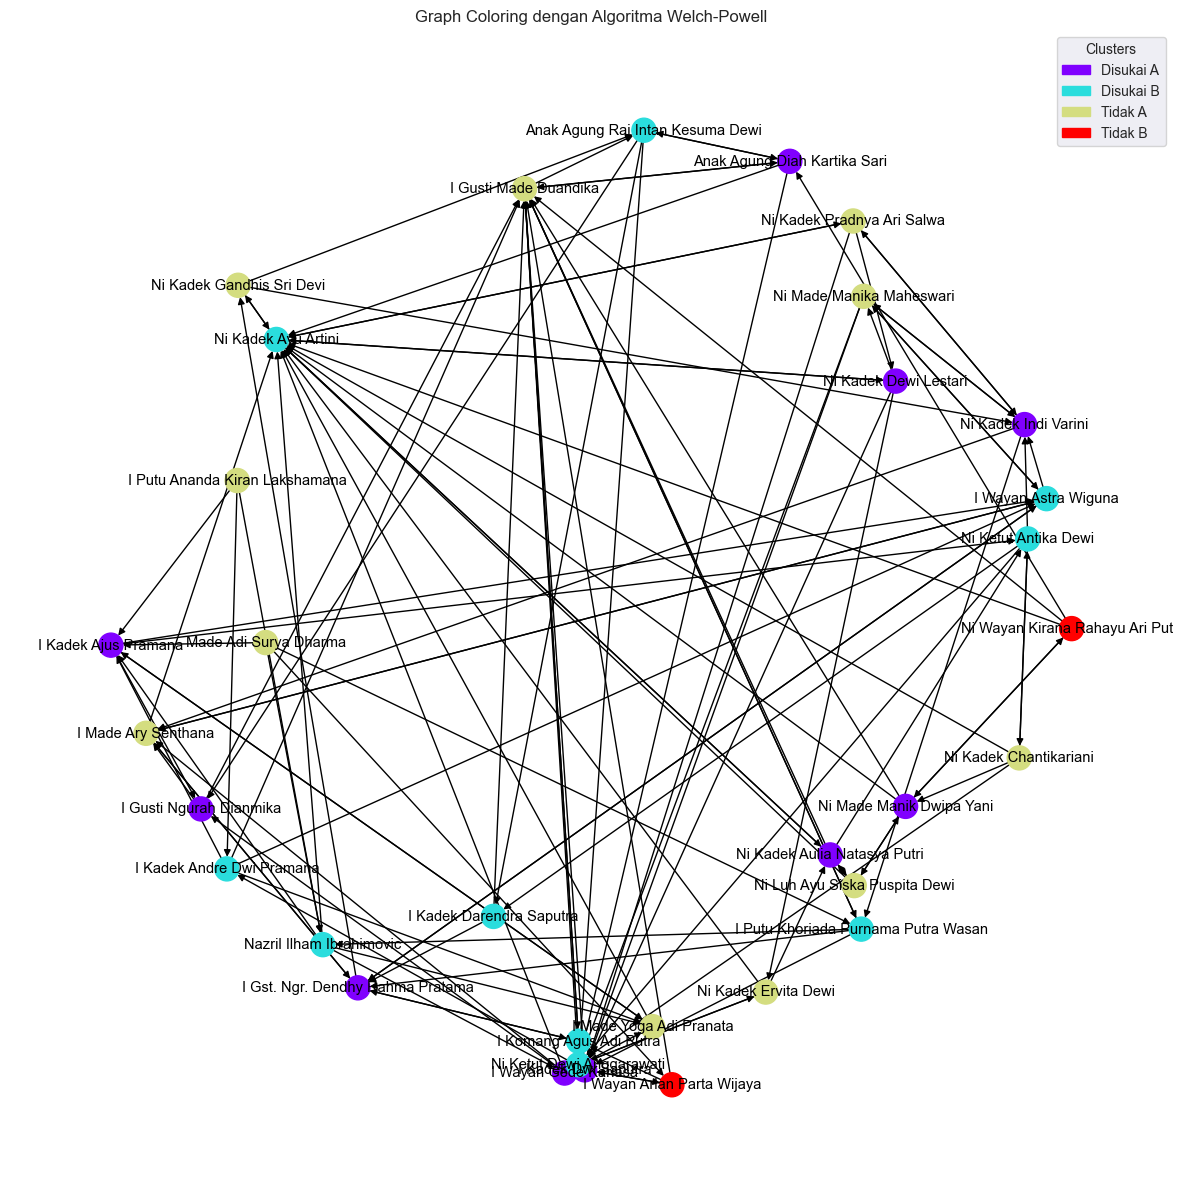

CPU times: user 8.65 s, sys: 522 ms, total: 9.17 s
Wall time: 17.8 s


In [29]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


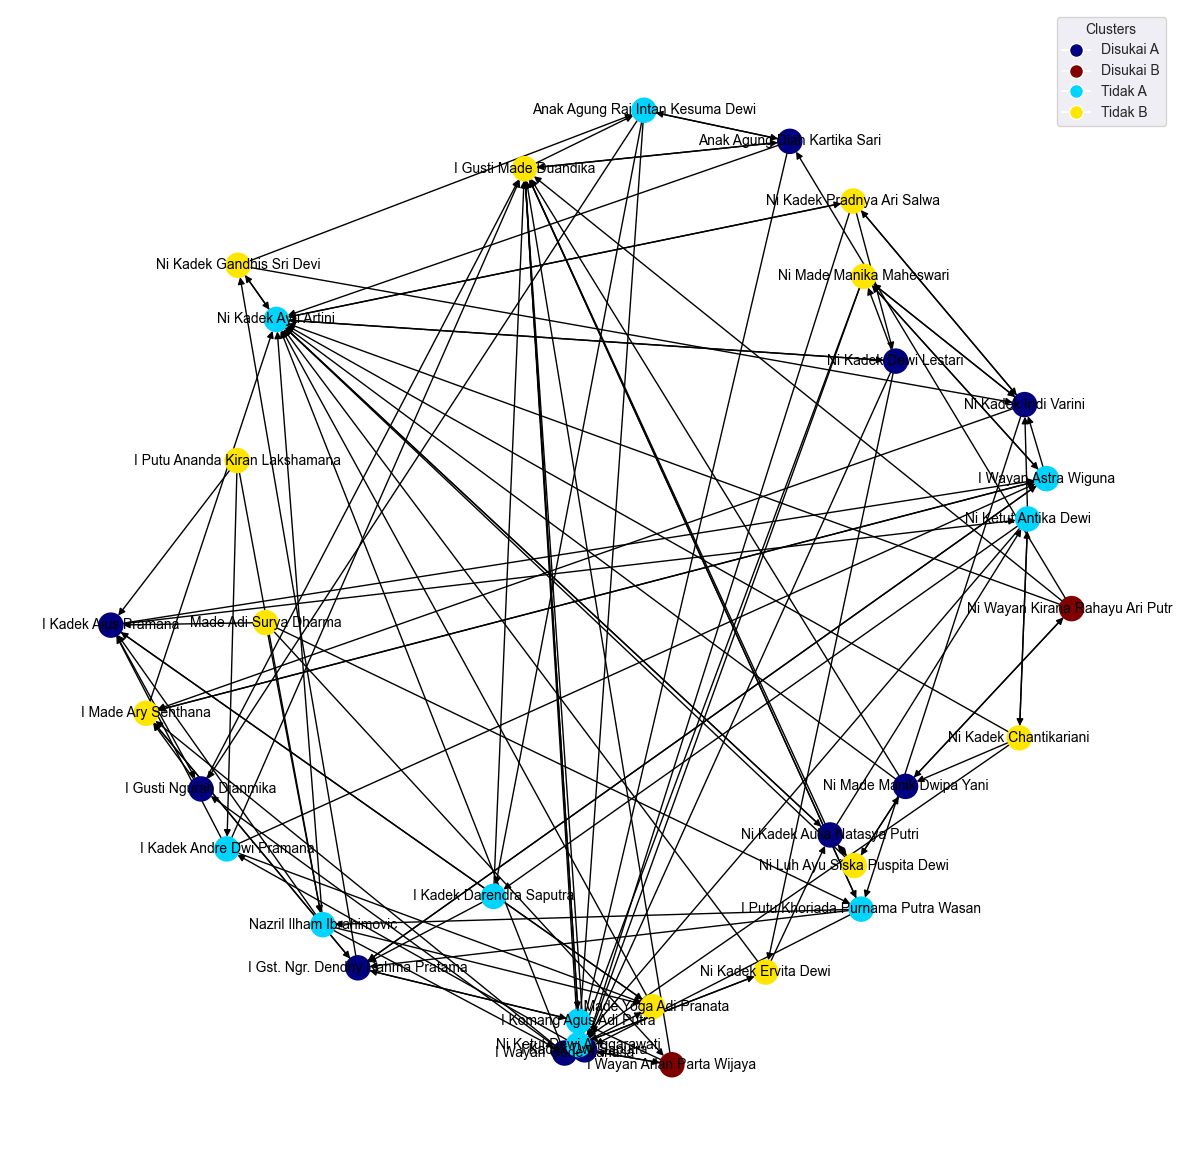

CPU times: user 7.87 s, sys: 492 ms, total: 8.36 s
Wall time: 12.5 s


In [30]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data G.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 21:22:09,anakagungdiahkartikasari089@gmail.com,Anak Agung Diah Kartika Sari,1,VIIG,Anak Agung Rai Intan Kesuma Dewi,Suka di ajak bercanda,I Gusti Made Duandika,Pelawak di semua tempat,Ni Kadek Ayu Artini,"Sipaling kurus sexy, suka pilih"" Teman yang go...",Ni Ketut Dewi Anggarawati,"Pacaran kelewatan batas, pas piket gak mau ban..."
1,6/20/2023 12:22:37,nikomangsulastriasih@gmail.com,Anak Agung Rai Intan Kesuma Dewi,2,VIIG,Anak Agung Diah Kartika Sari,karena dia baik,I Gusti Ngurah Dianmika,karen dia baik,I Kadek Darendra Saputra,karena nakal dan mengejek nama ortu,Ni Ketut Dewi Anggarawati,karena sombong
2,6/20/2023 12:24:35,nikomangsulastriasih@gmail.com,I Gusti Made Duandika,3,VIIG,Anak Agung Diah Kartika Sari,karena baik,Anak Agung Rai Intan Kesuma Dewi,karena baik,I Komang Agus Adi Putra,karena suka membully nama ortu,I Putu Khoriada Purnama Putra Wasan,karena suka membully nama ortu
3,5/10/2023 18:55:01,dhendyramapratama@gmail.com,I Gst. Ngr. Dendhy Rahma Pratama,4,VIIG,I Made Ary Senthana,karena teman dri kecil,I Komang Agus Adi Putra,karena akrab,I Wayan Astra Wiguna,karna tdk suka,Ni Kadek Gandhis Sri Devi,pikmi
4,5/5/2023 18:07:19,rahdedianmika@gmail.com,I Gusti Ngurah Dianmika,5,VIIG,I Made Ary Senthana,Baik hati,I Made Ary Senthana,Baik hati,I Gusti Made Duandika,Nakal,I Gusti Made Duandika,Nakal
5,6/20/2023 12:30:05,nikomangsulastriasih@gmail.com,I Kadek Ajus Pramana,6,VIIG,I Made Yoga Adi Pranata,karena bisa diajak bercanda,I Gusti Ngurah Dianmika,karena dia selalu bercanda,I Wayan Astra Wiguna,suka meremehkan teman,Ni Ketut Antika Dewi,suka membully saya
6,5/5/2023 18:11:56,rahdedianmika@gmail.com,I Kadek Andre Dwi Pramana,7,VIIG,I Made Yoga Adi Pranata,Baik,I Kadek Ajus Pramana,Baik,I Gusti Made Duandika,Jahil,I Wayan Astra Wiguna,Jahil
7,5/5/2023 19:46:57,kadekdarendrasaputra28@gmail.com,I Kadek Darendra Saputra,8,VIIG,I Gst. Ngr. Dendhy Rahma Pratama,Gampang di ajak bergaul dan lucu,I Gst. Ngr. Dendhy Rahma Pratama,orangnya seru dan baik,I Gusti Made Duandika,suka caper di kelas,I Gusti Made Duandika,"sering joget"" sendiri"
8,5/5/2023 17:58:26,lekungkebing@gmail.com,I Kadek Dwi Saputra,9,VIIG,I Kadek Andre Dwi Pramana,Karena sering di ajak,I Wayan Arlan Parta Wijaya,Karena suka bercanda,I Gusti Made Duandika,Gj,I Gusti Made Duandika,Karena sering menyindir saya
9,5/5/2023 18:42:28,mnggussss@gmail.com,I Komang Agus Adi Putra,10,VIIG,I Gst. Ngr. Dendhy Rahma Pratama,seru,I Kadek Dwi Saputra,asik,I Gusti Made Duandika,jahat,I Gusti Made Duandika,jahat


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,I Gst. Ngr. Dendhy Rahma Pratama,6.0,I Gusti Made Duandika,17.0
1,I Kadek Ajus Pramana,6.0,Ni Kadek Ayu Artini,15.0
2,Ni Kadek Indi Varini,4.0,I Wayan Astra Wiguna,4.0
3,I Kadek Dwi Saputra,4.0,Ni Ketut Dewi Anggarawati,4.0
4,Anak Agung Rai Intan Kesuma Dewi,3.0,Nazril Ilham Ibrahimovic,4.0
5,Anak Agung Diah Kartika Sari,3.0,I Made Ary Senthana,3.0
6,I Made Ary Senthana,3.0,I Putu Khoriada Purnama Putra Wasan,3.0
7,I Made Yoga Adi Pranata,3.0,I Kadek Dwi Saputra,3.0
8,Ni Made Manika Maheswari,3.0,I Kadek Darendra Saputra,2.0
9,I Gusti Ngurah Dianmika,3.0,Ni Kadek Indi Varini,2.0
